In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
test = session.query(Measurement).first()
test.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x236cbc77100>,
 'tobs': 65.0,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'prcp': 0.08,
 'id': 1}

In [11]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).first()
most_recent_date = str(most_recent_date)
most_recent_date

"('2017-08-23',)"

In [12]:
most_recent_as_dt = datetime.strptime(most_recent_date, "('%Y-%m-%d',)").date()
print(most_recent_as_dt)

2017-08-23


In [13]:
one_year_ago = most_recent_as_dt - dt.timedelta(days=365)
one_year_ago

datetime.date(2016, 8, 23)

In [14]:
data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago).all()

In [15]:
data_df = pd.DataFrame(data)
data_df = data_df.rename(columns={"date": "Date", "prcp": "Precipitation (in)"})
sorted_data_df = data_df.sort_values(by=["Date"], ascending=True)
sorted_data_df

,Date,Precipitation (in)
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


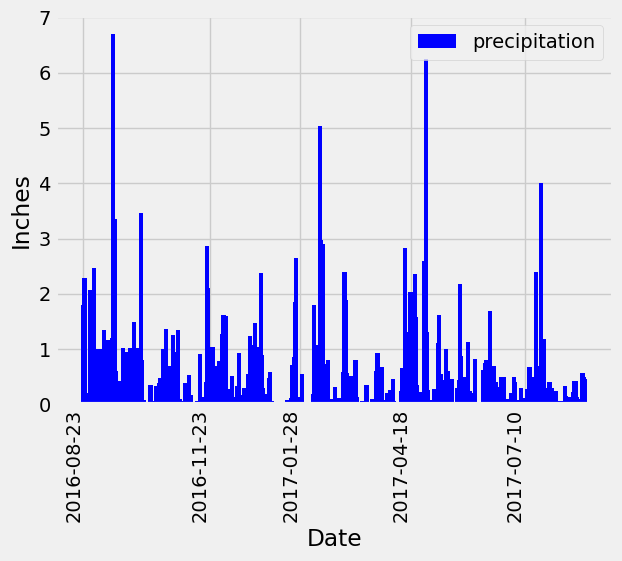

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_ago = most_recent_as_dt - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
data_df = pd.DataFrame(data)
data_df = data_df.rename(columns={"date": "Date", "prcp": "Precipitation (in)"})


# Sort the dataframe by date
sorted_data_df = data_df.sort_values(by=["Date"], ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
x_axis = sorted_data_df["Date"]
y_axis = sorted_data_df["Precipitation (in)"]
plt.bar(x_axis, y_axis, color='blue', width=3)
show_xticks = ['2016-08-23', '2016-11-23', '2017-01-28', '2017-04-18', '2017-07-10']
plt.xticks(show_xticks, rotation='vertical', ha='right')

plt.ylabel("Inches")
plt.xlabel("Date")

plt.legend(['precipitation'])

plt.show()

In [17]:
# Use Pandas to calculate the summary statistics for the precipitation data
sorted_data_df.describe()

,Precipitation (in)
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [18]:
test2 = session.query(Measurement).first()
test2.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x236cbc77100>,
 'tobs': 65.0,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'prcp': 0.08,
 'id': 1}

In [19]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(Measurement.station).distinct().count()
station_count

9

In [20]:
active_station = session.query(Station.station).all()
active_station

[('USC00519397',),
 ('USC00513117',),
 ('USC00514830',),
 ('USC00517948',),
 ('USC00518838',),
 ('USC00519523',),
 ('USC00519281',),
 ('USC00511918',),
 ('USC00516128',)]

In [37]:
test2 = session.query(Measurement).filter().count()
for x in test2:
    print(x)

TypeError: 'int' object is not iterable

In [33]:
test = session.query(Measurement.station).distinct().all()
for x in test:
    print(x)

('USC00519397',)
('USC00513117',)
('USC00514830',)
('USC00517948',)
('USC00518838',)
('USC00519523',)
('USC00519281',)
('USC00511918',)
('USC00516128',)


In [31]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_station = session.query(Station.station).all()
for stations in active_station:
    station_counts = (Measurement.station).filter(Measurement.station == stations).count()
print(station_counts)

InterfaceError: (sqlite3.InterfaceError) Error binding parameter 0 - probably unsupported type.
[SQL: SELECT count(*) AS count_1 
FROM (SELECT measurement.station AS measurement_station 
FROM measurement 
WHERE measurement.station = ?) AS anon_1]
[parameters: (('USC00519397',),)]
(Background on this error at: https://sqlalche.me/e/20/rvf5)

In [24]:
test_count = session.query(Measurement.station).filter(Measurement.station == 'USC00519397').count()
test_count

2724

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

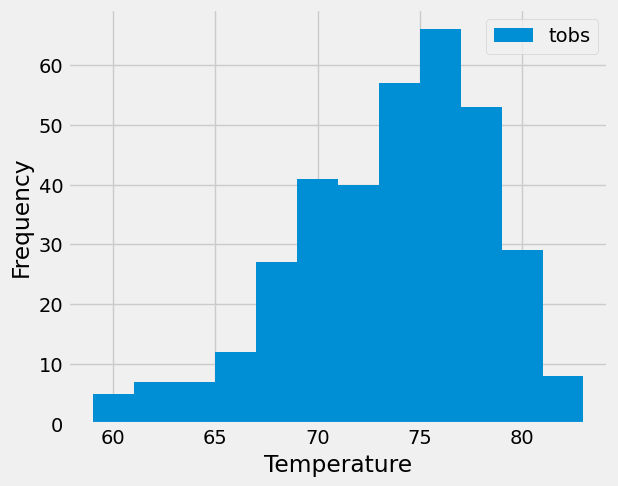

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()